# customer churn classification for telecommunication company

### importing needed modules 

In [1]:
# for data cleaning, EDA, and feature selection.
import numpy as np 
import pandas as pd 
# for feature transformation and rescaling 
from sklearn.preprocessing import StandardScaler
# for dimensionality reduction and feature extraction
from sklearn.decomposition import PCA 
# for classification models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# for models performance evaluation and comparison
from sklearn.model_selection import train_test_split , cross_val_score , KFold
# for hyperparameter tuning 
from sklearn.model_selection import GridSearchCV , KFold
# for model evaluation
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , roc_curve , auc , classification_report
# for pipeline 
from sklearn.pipeline import Pipeline
# for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv('telecom_churn_clean.csv')

# EDA

In [3]:
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


0    2850
1     483
Name: churn, dtype: int64

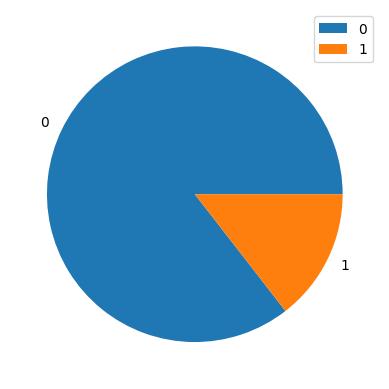

In [4]:
class_counts = df['churn'].value_counts()
plt.pie(class_counts , labels = [0,1])
plt.legend()
class_counts

### issue of unbalanced data , may affect model performance on predicting the churn customer [true positives]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [6]:
# feature selection
df = df.drop(columns = ['Unnamed: 0'] , axis = 1)

In [7]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
df.shape

(3333, 19)

In [9]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# feature transformation
>here we are dealing with heterogeneous features, the k-nearest neighbors (KNN) algorithm requires the data to be standardized prior to analysis. in contrast, decision tree and logistic regression algorithms can accommodate heterogeneous features without the need for preprocessing. however, standardization of the data may enhance the performance of a decision tree and prevent logistic regression from overfitting. despite this, it is not necessary to standardize data for both decision tree and logistic regression. instead, we will adopt separate pipelines for each of the models.

### splitting and standarizing

In [10]:
# splitting data 
x = df.drop('churn' , axis =1).values
y = df['churn'].values
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 42)

# standarizing 
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.transform(xtest)

# [models training and hyperparameter tuning]

# KNN

## scaled knn pipeline

In [11]:
# knn pipeline for scaled data
scaled_knn_steps = [("scaler" , StandardScaler()) , ("knn" , KNeighborsClassifier())]
scaled_knn_pipeline = Pipeline(scaled_knn_steps)

# grid search cross validation for training and hyper parameter tuning
knn_parameters = {'knn__n_neighbors':np.arange(1,20)}
scaled_knn_gscv = GridSearchCV(scaled_knn_pipeline , param_grid = knn_parameters )

# fitting and training the model 
scaled_knn_gscv.fit(xtrain , ytrain)
# best score and parameter
scaled_knn_gscv.best_score_ , scaled_knn_gscv.best_params_ 

(0.8897260225843399, {'knn__n_neighbors': 5})

## unscaled VS scaled knn model

In [12]:
# unscaled training
unscaled_knn = KNeighborsClassifier(n_neighbors = 5)
unscaled_knn.fit(xtrain , ytrain)
# scaled training
scaled_knn = KNeighborsClassifier(n_neighbors = 5)
scaled_knn.fit(scaled_xtrain , ytrain)
# scaled vs un scaled
scaled_knn.score(scaled_xtrain , ytrain) , unscaled_knn.score(xtrain , ytrain)

(0.9186046511627907, 0.8930982745686422)

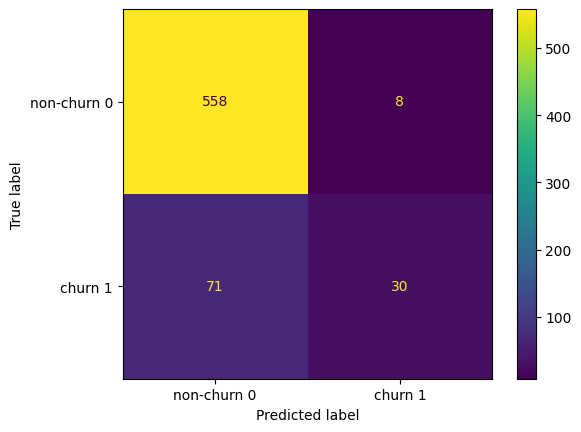

In [13]:
scaled_knn_ypred = scaled_knn.predict(scaled_xtest)
scaled_knn_cm = confusion_matrix(ytest , scaled_knn_ypred)
scaled_knn_cm_dis = ConfusionMatrixDisplay(confusion_matrix = scaled_knn_cm , display_labels = ['non-churn 0', 'churn 1'])
scaled_knn_cm_dis.plot() 

In [14]:
scaled_knn_report = classification_report(ytest , scaled_knn_ypred)
print(scaled_knn_report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       566
           1       0.79      0.30      0.43       101

    accuracy                           0.88       667
   macro avg       0.84      0.64      0.68       667
weighted avg       0.87      0.88      0.86       667



### ROC & AUC

In [15]:
knn_fpr , knn_tpr , knn_thrs = roc_curve(ytest , scaled_knn.predict_proba(scaled_xtest)[:,1])
knn_auc = auc(knn_fpr, knn_tpr)

# LOGISTIC REGRESSION

## scaled logistic regression pipeline 

In [16]:
# logistic regression pipeline for scaled data
scaled_logistic_steps = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
scaled_logistic_pipeline = Pipeline(scaled_logistic_steps)

# grid search cross validation for training and hyper parameter tuning
logistic_parameters = {'logistic__C': np.logspace(-4, 4, 20)}
scaled_logistic_gscv = GridSearchCV(scaled_logistic_pipeline, param_grid=logistic_parameters)

# fitting and training the model
scaled_logistic_gscv.fit(xtrain, ytrain)

# best score and parameter
scaled_logistic_gscv.best_score_, scaled_logistic_gscv.best_params_ 

(0.8627147585218291, {'logistic__C': 0.012742749857031334})

## unscaled VS scaled logistic regression model

In [17]:
# unscaled training
unscaled_logistic = LogisticRegression(C=0.012742749857031334)
unscaled_logistic.fit(xtrain , ytrain)
# scaled training
scaled_logistic = LogisticRegression(C=0.012742749857031334)
scaled_logistic.fit(scaled_xtrain , ytrain)
# scaled vs un scaled
scaled_logistic.score(scaled_xtrain , ytrain) , unscaled_logistic.score(xtrain , ytrain)

(0.8649662415603901, 0.8567141785446362)

- scaling the data in logistic regression did not make a big difference in the model score .

### evaluating the model predictions 

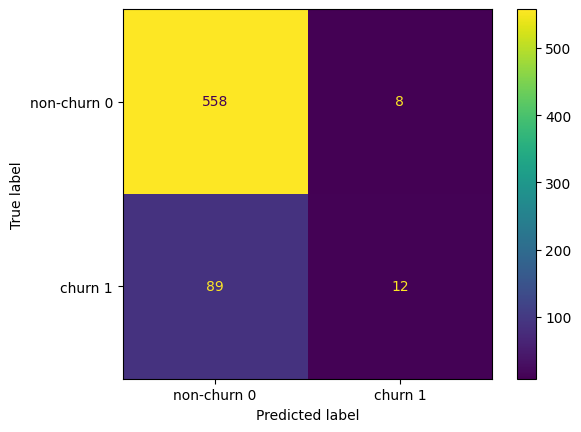

In [18]:
scaled_logistic_ypred = scaled_logistic.predict(scaled_xtest)
scaled_logistic_cm = confusion_matrix(ytest , scaled_logistic_ypred)
scaled_logistic_cm_dis = ConfusionMatrixDisplay(confusion_matrix = scaled_logistic_cm , display_labels = ['non-churn 0', 'churn 1'])
scaled_logistic_cm_dis.plot() 

In [19]:
scaled_logistic_report = classification_report(ytest , scaled_logistic_ypred)
print(scaled_logistic_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.60      0.12      0.20       101

    accuracy                           0.85       667
   macro avg       0.73      0.55      0.56       667
weighted avg       0.82      0.85      0.81       667



### setting the best threshold for the logistic regression model the maximizes the True Positive predictions

In [20]:
scaled_logistic_yprop = scaled_logistic.predict_proba(scaled_xtest)
scaled_logistic_yprop

array([[0.82120651, 0.17879349],
       [0.96572093, 0.03427907],
       [0.96001764, 0.03998236],
       ...,
       [0.96168817, 0.03831183],
       [0.96627063, 0.03372937],
       [0.95427473, 0.04572527]])

In [21]:
fpr , tpr , thrs = roc_curve(ytest , scaled_logistic_yprop[:,1])
roc = pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Thresholds': thrs})
roc

,TPR,FPR,Thresholds
0,0.000000,0.000000,1.801745
1,0.009901,0.000000,0.801745
2,0.009901,0.003534,0.750856
3,0.049505,0.003534,0.648542
4,0.049505,0.005300,0.646280
...,...,...,...
130,0.970297,0.911661,0.029931
131,0.980198,0.911661,0.029893
132,0.980198,0.943463,0.025014
133,1.000000,0.943463,0.023662


- The optimal threshold is the threshold that results in the highest TPR while keeping the FPR as low as possible.

In [22]:
max_tpr = np.max(tpr)
max_tpr_idx = np.argmax(tpr)
optimal_threshold = thrs[np.argmax(tpr - fpr)]
optimal_threshold

0.15905771177621894

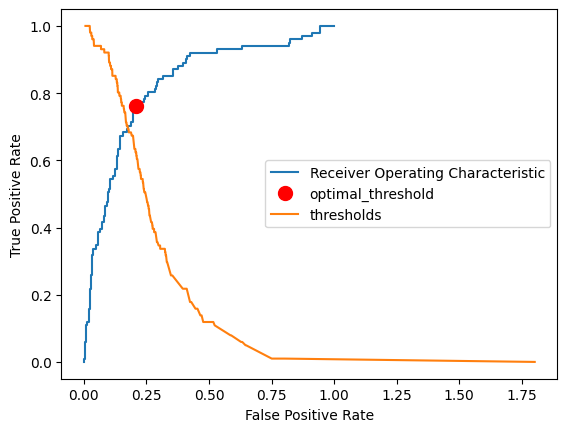

In [23]:
plt.plot(fpr, tpr, label='Receiver Operating Characteristic')
plt.plot(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], 'o', markersize=10, color='red' , label = 'optimal_threshold')
plt.plot(thrs , tpr , label='thresholds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### measuring the model overall perfomance AUC
-  The AUC is not affected by the threshold, and it is a measure of the overall performance of the model.

In [24]:
log_auc = auc(fpr, tpr)

### evaluating the model predictions after setting the optimal threshold


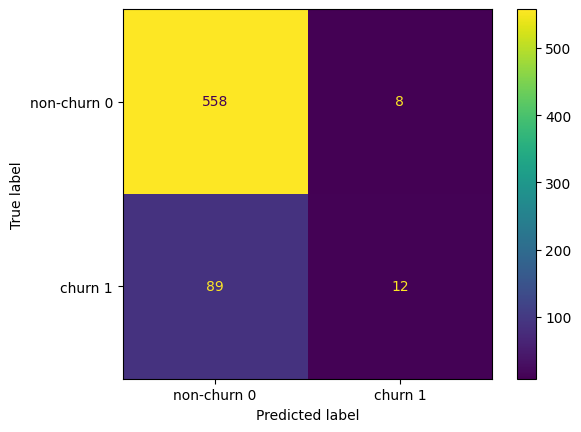

In [25]:
scaled_logistic_yprop = scaled_logistic.predict_proba(scaled_xtest)
thrs_scaled_logistic_ypred = (scaled_logistic_yprop[:, 1] == optimal_threshold)
thrs_scaled_logistic_cm = confusion_matrix(ytest , thrs_scaled_logistic_ypred)
thrs_scaled_logistic_cm_dis = ConfusionMatrixDisplay(confusion_matrix = thrs_scaled_logistic_cm , display_labels = ['non-churn 0', 'churn 1'])
scaled_logistic_cm_dis.plot() 

- both the scaled logistic regression and the scaled logistic regression with the optimal threshold are giving the same result due to the unbalanced classes, so we would use either of them , or resample the dataset after taking the marketing team consideration.

### comparing knn vs logistic regression performance

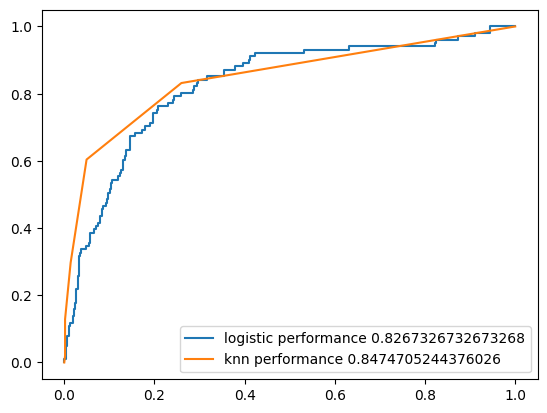

In [26]:
plt.plot(fpr, tpr, label=f'logistic performance {log_auc}' )
plt.plot(knn_fpr, knn_tpr, label=f'knn performance {knn_auc}')
plt.legend()


### the KNN model is performing better than the logistic regression one

# Decision Tree Classifier

In [27]:
dt_steps = [('scaler' , StandardScaler()) , ('decision_tree' , DecisionTreeClassifier())]
dt_pipeline = Pipeline(dt_steps)
dt_parameters = {'decision_tree__criterion':['gini','entropy'], 'decision_tree__max_depth':np.arange(1,10)}
scaled_dt_gscv = GridSearchCV(dt_pipeline , param_grid=dt_parameters)
scaled_dt_gscv.fit(xtrain,ytrain)
scaled_dt_gscv.best_params_ , scaled_dt_gscv.best_score_

({'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 6},
 0.9426109014763441)

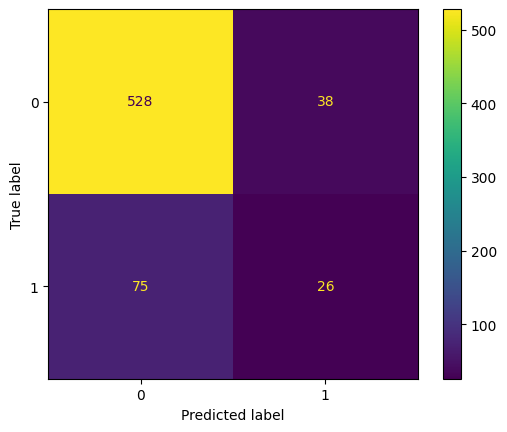

In [28]:
dt_ypred = scaled_dt_gscv.predict(scaled_xtest)
dt_cm=confusion_matrix(ytest,dt_ypred)
dt_cm_dis = ConfusionMatrixDisplay(confusion_matrix = dt_cm )
dt_cm_dis.plot()

In [29]:
print(classification_report(ytest,dt_ypred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       566
           1       0.41      0.26      0.32       101

    accuracy                           0.83       667
   macro avg       0.64      0.60      0.61       667
weighted avg       0.80      0.83      0.81       667



In [30]:
dt_fpr , dt_tpr , dt_thrs = roc_curve(ytest,dt_ypred)
dt_auc = auc(dt_fpr , dt_tpr)

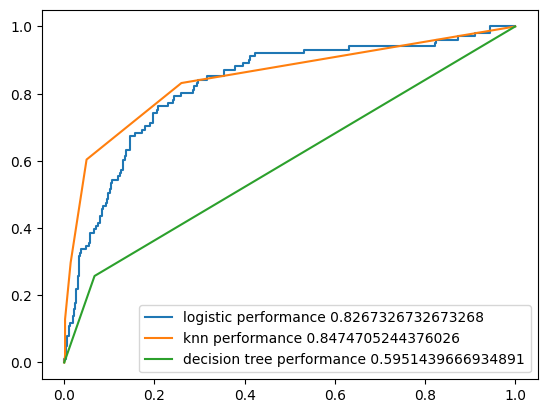

In [31]:
plt.plot(fpr, tpr, label=f'logistic performance {log_auc}' )
plt.plot(knn_fpr, knn_tpr, label=f'knn performance {knn_auc}')
plt.plot(dt_fpr , dt_tpr, label=f'decision tree performance {dt_auc}')

plt.legend()

- decision tree model performed the worst among the three models